# Loan Default Prediction

<img src="default_loan.jpg" width="700">

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

This study is to explore the possibility of building a model that predicts the probability on whether a given customer profile will default on a loan or not based on their transaction history. 


## Part I: Predictive Modelling 

### Reading the Data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec
import seaborn as sns

In [14]:
df = pd.read_csv('challenge_train.csv')
df.head(20)

,customer_id,LoanAmount,LoanDate,TrxDate,DaysBeforeRequest,Debit,Credit,Amount,Balance,IsDefault
0,53D56093-8B75-4053-B102-DE8BBEB7438B-250,250,2017-10-01,2017-08-24,38,29.06,0.00,-29.06,789.17,0
1,53D56093-8B75-4053-B102-DE8BBEB7438B-250,250,2017-10-01,2017-08-24,38,340.00,0.00,-340.00,427.89,0
2,53D56093-8B75-4053-B102-DE8BBEB7438B-250,250,2017-10-01,2017-08-24,38,25.63,0.00,-25.63,304.54,0
3,53D56093-8B75-4053-B102-DE8BBEB7438B-250,250,2017-10-01,2017-08-24,38,0.00,285.62,285.62,362.83,0
4,53D56093-8B75-4053-B102-DE8BBEB7438B-250,250,2017-10-01,2017-08-24,38,29.24,0.00,-29.24,330.17,0
5,53D56093-8B75-4053-B102-DE8BBEB7438B-250,250,2017-10-01,2017-08-24,38,29.06,0.00,-29.06,789.17,0
6,53D56093-8B75-4053-B102-DE8BBEB7438B-250,250,2017-10-01,2017-08-24,38,68.48,0.00,-68.48,359.41,0
7,53D56093-8B75-4053-B102-DE8BBEB7438B-250,250,2017-10-01,2017-08-24,38,20.00,0.00,-20.00,818.23,0
8,53D56093-8B75-4053-B102-DE8BBEB7438B-250,250,2017-10-01,2017-08-24,38,0.00,1.00,1.00,3.00,0
9,53D56093-8B75-4053-B102-DE8BBEB7438B-250,250,2017-10-01,2017-08-24,38,50.00,0.00,-50.00,1039.23,0


At first glance, this dataset seems to be in a transaction history format. Let's get a sense of how many transactions each LoanFlinksId has:

In [15]:
df.customer_id.value_counts()

B773E333-AD29-4383-BE7F-5C3F09F87235-250     2001
442A1E55-D14C-41B2-9A3B-568524FFB147-500     1345
6C476EC8-0CBE-46BF-887E-F53245943FD6-250     1309
6E81434A-8583-4742-83FB-3B8812882CF8-500     1230
6877F72C-9C43-4A6B-B0A2-4D316A95BC24-1000    1199
C908B8E6-36E5-430F-8437-3C23C16F4182-250     1188
FACB8660-8F40-4C04-8DD3-EE4955579EBC-1000    1181
F68F33A2-3D3C-4D1B-A6B0-BF0944DA2244-250     1155
A705DDD7-DCDB-4134-BA85-F7A77CEB5EA4-1250    1096
A21D467B-2E8A-4AD7-8984-F000A9C8488B-500     1083
E046F00C-E671-4266-9F70-531C9C85B783-500     1061
614B2767-41D7-4BBF-A002-42CE7D6BDD0B-500     1056
11FA2430-D82F-4CDD-B64D-DEC2582C52EB-750     1045
48036348-F07F-4A94-AB37-570DE75352CF-1000    1038
A561DC1B-A32D-4D78-B259-6EA82EFCC55A-500     1034
C5B71E91-5E12-4E0E-8375-7A2B73F07E35-750     1029
BE6CD170-C4F5-472A-80C1-AA0DA0B23EDB-500     1023
A0A80195-0146-4F8F-91D5-BE42B3EC2117-1000    1022
856A0ABF-7CF2-4A23-9DAC-870A0A3657A7-750     1020
7F95447F-B067-41A2-AAED-3F886CADB0EB-750     1002


In [16]:
df.DaysBeforeRequest.describe()

count    4.122934e+06
mean     4.323428e+01
std      2.575328e+01
min      1.000000e+00
25%      2.100000e+01
50%      4.300000e+01
75%      6.500000e+01
max      8.900000e+01
Name: DaysBeforeRequest, dtype: float64

### Features Engineering

Each customer_id has more than one transaction associated to it (i.e. between 25 to 2001 transactions). Features engineering is required before this dataset can be used to train a prediction model. I will approach this by aggregating the transactions history into features for each customer_id. Some potential features that may be extracted from this dataset:
- average daily number of debit transactions
- average daily number of credit transactions
- standard deviation of daily number of debit transactions
- standard deviation of daily number of credit transactions per day
- average debit amount per transaction
- average credit amount per transaction
- standard deviation of debit amount per transaction
- standard deviation of credit amount per transaction
- average daily debit amount
- average daily credit amount
- standard deviation of daily debit amount
- standard deviation of daily credit amount
- total net amount (i.e. total debit - total credit)
- net amount 1 day prior to loan request
- net amount 5 days prior to loan request
- net amount 10 days prior to loan request
- net amount 20 days prior to loan request
- net amount 30 days prior to loan request
- average daily net amount
- standard deviation of daily net amount
- median of daily net amount
- skewness of daily net amount
- loan amount
- month of the loan request
- range of debit amount
- range of credit amount
- total transactions count
- total debit count
- total credit count
- total debit count 5 days prior to loan request
- debit count 1 day prior to loan request
- debit count 3 days prior to loan request
- debit count 5 days prior to loan request
- number of days with negative net amount
- number of days with positive net amount

Other "pairwise interaction" features:
- loan amount x loan month
- loan amount to debit count 5 days prior to loan request ratio
- loan month x number of days with negative net amount

**note**: these features may be unintuitive, but it's a feature engineering technique commonly expored in Kaggle Competitions. 

I'll now define a custom function to perform the features extraction which will be re-used on the testing dataset later: 

In [17]:
def features_extract(df):
    df_avg_daily_debit_cnt = pd.DataFrame((df[df.Debit >0].groupby(['customer_id','TrxDate']).count()[['Debit']]).groupby('customer_id')['Debit'].mean())
    df_avg_daily_debit_cnt.columns = ['avg_daily_debit_cnt']
    
    df_avg_daily_credit_cnt = pd.DataFrame((df[df.Credit >0].groupby(['customer_id','TrxDate']).count()[['Credit']]).groupby('customer_id')['Credit'].mean())
    df_avg_daily_credit_cnt.columns = ['avg_daily_credit_cnt']
    
    df_std_daily_debit_cnt = pd.DataFrame((df[df.Debit >0].groupby(['customer_id','TrxDate']).count()[['Debit']]).groupby('customer_id')['Debit'].std())
    df_std_daily_debit_cnt.columns = ['std_daily_debit_cnt']
    
    df_std_daily_credit_cnt = pd.DataFrame((df[df.Credit >0].groupby(['customer_id','TrxDate']).count()[['Credit']]).groupby('customer_id')['Credit'].std())
    df_std_daily_credit_cnt.columns = ['std_daily_credit_cnt']
    
    df_avg_debit_amt = pd.DataFrame(df[df.Debit >0].groupby(['customer_id']).mean()[['Debit']])
    df_avg_debit_amt.columns = ['avg_debit_amt']
    
    df_avg_credit_amt = pd.DataFrame(df[df.Credit >0].groupby(['customer_id']).mean()[['Credit']])
    df_avg_credit_amt.columns = ['avg_credit_amt']
    
    df_std_debit_amt = pd.DataFrame(df[df.Debit >0].groupby(['customer_id']).std()[['Debit']])
    df_std_debit_amt.columns = ['std_debit_amt']
    
    df_std_credit_amt = pd.DataFrame(df[df.Credit >0].groupby(['customer_id']).std()[['Credit']])
    df_std_credit_amt.columns = ['std_credit_amt']
    
    df_avg_daily_debit_amt = pd.DataFrame((df[df.Debit >0].groupby(['customer_id','TrxDate']).sum()[['Debit']]).groupby('customer_id')['Debit'].mean())
    df_avg_daily_debit_amt.columns = ['avg_daily_debit_amt']
    
    df_avg_daily_credit_amt = pd.DataFrame((df[df.Credit >0].groupby(['customer_id','TrxDate']).sum()[['Credit']]).groupby('customer_id')['Credit'].mean())
    df_avg_daily_credit_amt.columns = ['avg_daily_credit_amt']
    
    df_std_daily_debit_amt = pd.DataFrame((df[df.Debit >0].groupby(['customer_id','TrxDate']).sum()[['Debit']]).groupby('customer_id')['Debit'].std())
    df_std_daily_debit_amt.columns = ['std_daily_debit_amt']
    
    df_std_daily_credit_amt = pd.DataFrame((df[df.Credit >0].groupby(['customer_id','TrxDate']).sum()[['Credit']]).groupby('customer_id')['Credit'].std())
    df_std_daily_credit_amt.columns = ['std_daily_credit_amt']        
    
    df_tot_net_amt = pd.DataFrame(df.groupby(['customer_id']).sum()[['Amount']])
    df_tot_net_amt.columns = ['net_amt']

    df_1day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==1].groupby(['customer_id']).sum()[['Amount']])
    df_1day_net_amt.columns = ['1day_net_amt']
    
    df_2day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==2].groupby(['customer_id']).sum()[['Amount']])
    df_2day_net_amt.columns = ['2day_net_amt']
    
    df_3day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==3].groupby(['customer_id']).sum()[['Amount']])
    df_3day_net_amt.columns = ['3day_net_amt']
    
    df_4day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==4].groupby(['customer_id']).sum()[['Amount']])
    df_4day_net_amt.columns = ['4day_net_amt']

    df_5day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==5].groupby(['customer_id']).sum()[['Amount']])
    df_5day_net_amt.columns = ['5day_net_amt']

    df_10day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==10].groupby(['customer_id']).sum()[['Amount']])
    df_10day_net_amt.columns = ['10day_net_amt']
    
    df_20day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==20].groupby(['customer_id']).sum()[['Amount']])
    df_20day_net_amt.columns = ['20day_net_amt']
    
    df_30day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==30].groupby(['customer_id']).sum()[['Amount']])
    df_30day_net_amt.columns = ['30day_net_amt']
    
    df_avg_daily_net_amt = pd.DataFrame((df.groupby(['customer_id','TrxDate']).sum()[['Amount']]).groupby('customer_id')['Amount'].mean())
    df_avg_daily_net_amt.columns = ['avg_daily_net_amt']
    
    df_std_daily_net_amt = pd.DataFrame((df.groupby(['customer_id','TrxDate']).sum()[['Amount']]).groupby('customer_id')['Amount'].std())
    df_std_daily_net_amt.columns = ['std_daily_net_amt']
    
    df_mdn_daily_net_amt = pd.DataFrame((df.groupby(['customer_id','TrxDate']).sum()[['Amount']]).groupby('customer_id')['Amount'].median())
    df_mdn_daily_net_amt.columns = ['mdn_daily_net_amt']
    
    df_skw_daily_net_amt = pd.DataFrame((df.groupby(['customer_id','TrxDate']).sum()[['Amount']]).groupby('customer_id')['Amount'].skew())
    df_skw_daily_net_amt.columns = ['skw_daily_net_amt']
    
    df['LoanDate'] =  pd.to_datetime(df['LoanDate'], format='%Y-%m-%d')
    df['LoanMonth'] = df['LoanDate'].dt.month

    df_range_debit_amt = pd.DataFrame(df[df.Debit >0].groupby(['customer_id']).apply(lambda x: x.Debit.max() - x.Debit.min()))
    df_range_debit_amt.columns = ['range_debit_amt']
                        
    df_range_credit_amt = pd.DataFrame(df[df.Credit >0].groupby(['customer_id']).apply(lambda x: x.Credit.max() - x.Credit.min()))
    df_range_credit_amt.columns = ['range_credit_amt']                                      

    df_range_credit_amt = pd.DataFrame(df[df.Credit >0].groupby(['customer_id']).apply(lambda x: x.Credit.max() - x.Credit.min()))
    df_range_credit_amt.columns = ['range_credit_amt']    

    df_tot_trx_cnt = pd.DataFrame(df.groupby(['customer_id']).count()[['Amount']])
    df_tot_trx_cnt.columns = ['tot_trx_cnt']

    df_tot_debit_cnt = pd.DataFrame(df[df.Debit >0].groupby(['customer_id']).count()[['Debit']])
    df_tot_debit_cnt.columns = ['tot_debit_cnt']

    df_tot_credit_cnt = pd.DataFrame(df[df.Credit >0].groupby(['customer_id']).count()[['Credit']])
    df_tot_credit_cnt.columns = ['tot_credit_cnt'] 
    
    df_tot_5day_debit_cnt = pd.DataFrame(df[(df.Debit >0) & (df.DaysBeforeRequest<6)].groupby(['customer_id']).count()[['Debit']])
    df_tot_5day_debit_cnt.columns = ['tot_5day_debit_cnt']

    df_1day_debit_cnt = pd.DataFrame(df[(df.Debit >0) & (df.DaysBeforeRequest==1)].groupby(['customer_id']).count()[['Debit']])
    df_1day_debit_cnt.columns = ['1day_debit_cnt']    

    df_3day_debit_cnt = pd.DataFrame(df[(df.Debit >0) & (df.DaysBeforeRequest==3)].groupby(['customer_id']).count()[['Debit']])
    df_3day_debit_cnt.columns = ['3day_debit_cnt']    
    
    df_5day_debit_cnt = pd.DataFrame(df[(df.Debit >0) & (df.DaysBeforeRequest==5)].groupby(['customer_id']).count()[['Debit']])
    df_5day_debit_cnt.columns = ['5day_debit_cnt']  

    net_amt_by_day = pd.DataFrame(df.groupby(['customer_id','TrxDate']).sum()[['Amount']])
    net_amt_by_day .columns = ['net_amt']    
    days_neg_net_amt = net_amt_by_day[net_amt_by_day.net_amt<0].groupby('customer_id').count()
    days_neg_net_amt.columns = ['days_neg_amt'] 
    days_pos_net_amt = net_amt_by_day[net_amt_by_day.net_amt>0].groupby('customer_id').count()
    days_pos_net_amt.columns = ['days_pos_amt']
    

    df_base = df[['customer_id','IsDefault','LoanAmount', 'LoanMonth']].drop_duplicates(keep='first').set_index('customer_id')
    
    df_merged = pd.concat([df_base, 
                       df_avg_daily_debit_cnt, 
                       df_avg_daily_credit_cnt,
                       df_std_daily_debit_cnt,
                       df_std_daily_credit_cnt,
                       df_avg_debit_amt, 
                       df_avg_credit_amt,
                       df_std_debit_amt,
                       df_std_credit_amt,
                       df_avg_daily_debit_amt,
                       df_avg_daily_credit_amt,
                       df_std_daily_debit_amt,
                       df_std_daily_credit_amt,
                       df_tot_net_amt,
                       df_1day_net_amt,
                       df_2day_net_amt,
                       df_3day_net_amt,
                       df_4day_net_amt,
                       df_5day_net_amt,
                       df_10day_net_amt,
                       df_20day_net_amt, 
                       df_30day_net_amt,     
                       df_avg_daily_net_amt,
                       df_std_daily_net_amt,
                       df_mdn_daily_net_amt,
                       df_skw_daily_net_amt,
                       df_range_debit_amt,
                       df_tot_trx_cnt,
                       df_tot_debit_cnt,
                       df_tot_credit_cnt, 
                       df_tot_5day_debit_cnt,
                       df_1day_debit_cnt,
                       df_3day_debit_cnt,
                       df_5day_debit_cnt,
                       days_neg_net_amt,
                       days_pos_net_amt
                       ], 
                       axis=1, sort=True).reindex(df_base.index)
    
    df_merged.reset_index(inplace=True)
    
    #interaction features engineering
    df_merged['loan_x_month'] = df_merged.LoanAmount * df_merged.LoanMonth
    df_merged['loan_to_5day_debit_cnt'] = df_merged.LoanAmount / df_merged.tot_5day_debit_cnt
    df_merged['month_x_days_neg_amt'] = df_merged.LoanMonth * df_merged.days_neg_amt
    
    #mean-encoding Loan Month
    df_mean_encode = pd.DataFrame(df[df.IsDefault==1].groupby(['LoanMonth']).count()[['IsDefault']])
    df_mean_encode['tot_cnt'] = df.groupby(['LoanMonth']).count()[['IsDefault']]
    df_mean_encode['mean_encode'] = df_mean_encode.IsDefault / df_mean_encode.tot_cnt
    df_mean_encode.reset_index(inplace=True)
    df_merged = pd.merge(df_merged, df_mean_encode.iloc[:,[0,3]], on='LoanMonth')
    
    #Other features that I've tried:
    df_merged['month_x_5day_debit_cnt'] = df_merged.LoanMonth * df_merged.tot_5day_debit_cnt
    #df_merged['month_x_5day_debit_cnt'] = df_merged.LoanMonth * df_merged['5day_debit_cnt']
    #df_merged['loan_x_month_x_days_neg_amt'] = df_merged.month_x_days_neg_amt * df_merged.days_neg_amt
 
    df_merged.fillna(0, inplace=True)
    return df_merged

In [18]:
def features_extract_test(df, df_train):
    df_avg_daily_debit_cnt = pd.DataFrame((df[df.Debit >0].groupby(['customer_id','TrxDate']).count()[['Debit']]).groupby('customer_id')['Debit'].mean())
    df_avg_daily_debit_cnt.columns = ['avg_daily_debit_cnt']
    
    df_avg_daily_credit_cnt = pd.DataFrame((df[df.Credit >0].groupby(['customer_id','TrxDate']).count()[['Credit']]).groupby('customer_id')['Credit'].mean())
    df_avg_daily_credit_cnt.columns = ['avg_daily_credit_cnt']
    
    df_std_daily_debit_cnt = pd.DataFrame((df[df.Debit >0].groupby(['customer_id','TrxDate']).count()[['Debit']]).groupby('customer_id')['Debit'].std())
    df_std_daily_debit_cnt.columns = ['std_daily_debit_cnt']
    
    df_std_daily_credit_cnt = pd.DataFrame((df[df.Credit >0].groupby(['customer_id','TrxDate']).count()[['Credit']]).groupby('customer_id')['Credit'].std())
    df_std_daily_credit_cnt.columns = ['std_daily_credit_cnt']
    
    df_avg_debit_amt = pd.DataFrame(df[df.Debit >0].groupby(['customer_id']).mean()[['Debit']])
    df_avg_debit_amt.columns = ['avg_debit_amt']
    
    df_avg_credit_amt = pd.DataFrame(df[df.Credit >0].groupby(['customer_id']).mean()[['Credit']])
    df_avg_credit_amt.columns = ['avg_credit_amt']
    
    df_std_debit_amt = pd.DataFrame(df[df.Debit >0].groupby(['customer_id']).std()[['Debit']])
    df_std_debit_amt.columns = ['std_debit_amt']
    
    df_std_credit_amt = pd.DataFrame(df[df.Credit >0].groupby(['customer_id']).std()[['Credit']])
    df_std_credit_amt.columns = ['std_credit_amt']
    
    df_avg_daily_debit_amt = pd.DataFrame((df[df.Debit >0].groupby(['customer_id','TrxDate']).sum()[['Debit']]).groupby('customer_id')['Debit'].mean())
    df_avg_daily_debit_amt.columns = ['avg_daily_debit_amt']
    
    df_avg_daily_credit_amt = pd.DataFrame((df[df.Credit >0].groupby(['customer_id','TrxDate']).sum()[['Credit']]).groupby('customer_id')['Credit'].mean())
    df_avg_daily_credit_amt.columns = ['avg_daily_credit_amt']
    
    df_std_daily_debit_amt = pd.DataFrame((df[df.Debit >0].groupby(['customer_id','TrxDate']).sum()[['Debit']]).groupby('customer_id')['Debit'].std())
    df_std_daily_debit_amt.columns = ['std_daily_debit_amt']
    
    df_std_daily_credit_amt = pd.DataFrame((df[df.Credit >0].groupby(['customer_id','TrxDate']).sum()[['Credit']]).groupby('customer_id')['Credit'].std())
    df_std_daily_credit_amt.columns = ['std_daily_credit_amt']        
    
    df_tot_net_amt = pd.DataFrame(df.groupby(['customer_id']).sum()[['Amount']])
    df_tot_net_amt.columns = ['net_amt']

    df_1day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==1].groupby(['customer_id']).sum()[['Amount']])
    df_1day_net_amt.columns = ['1day_net_amt']
    
    df_2day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==2].groupby(['customer_id']).sum()[['Amount']])
    df_2day_net_amt.columns = ['2day_net_amt']
    
    df_3day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==3].groupby(['customer_id']).sum()[['Amount']])
    df_3day_net_amt.columns = ['3day_net_amt']
    
    df_4day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==4].groupby(['customer_id']).sum()[['Amount']])
    df_4day_net_amt.columns = ['4day_net_amt']

    df_5day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==5].groupby(['customer_id']).sum()[['Amount']])
    df_5day_net_amt.columns = ['5day_net_amt']

    df_10day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==10].groupby(['customer_id']).sum()[['Amount']])
    df_10day_net_amt.columns = ['10day_net_amt']
    
    df_20day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==20].groupby(['customer_id']).sum()[['Amount']])
    df_20day_net_amt.columns = ['20day_net_amt']
    
    df_30day_net_amt = pd.DataFrame(df[df.DaysBeforeRequest==30].groupby(['customer_id']).sum()[['Amount']])
    df_30day_net_amt.columns = ['30day_net_amt']
    
    df_avg_daily_net_amt = pd.DataFrame((df.groupby(['customer_id','TrxDate']).sum()[['Amount']]).groupby('customer_id')['Amount'].mean())
    df_avg_daily_net_amt.columns = ['avg_daily_net_amt']
    
    df_std_daily_net_amt = pd.DataFrame((df.groupby(['customer_id','TrxDate']).sum()[['Amount']]).groupby('customer_id')['Amount'].std())
    df_std_daily_net_amt.columns = ['std_daily_net_amt']
    
    df_mdn_daily_net_amt = pd.DataFrame((df.groupby(['customer_id','TrxDate']).sum()[['Amount']]).groupby('customer_id')['Amount'].median())
    df_mdn_daily_net_amt.columns = ['mdn_daily_net_amt']
    
    df_skw_daily_net_amt = pd.DataFrame((df.groupby(['customer_id','TrxDate']).sum()[['Amount']]).groupby('customer_id')['Amount'].skew())
    df_skw_daily_net_amt.columns = ['skw_daily_net_amt']
    
    df['LoanDate'] =  pd.to_datetime(df['LoanDate'], format='%Y-%m-%d')
    df['LoanMonth'] = df['LoanDate'].dt.month

    df_range_debit_amt = pd.DataFrame(df[df.Debit >0].groupby(['customer_id']).apply(lambda x: x.Debit.max() - x.Debit.min()))
    df_range_debit_amt.columns = ['range_debit_amt']
                        
    df_range_credit_amt = pd.DataFrame(df[df.Credit >0].groupby(['customer_id']).apply(lambda x: x.Credit.max() - x.Credit.min()))
    df_range_credit_amt.columns = ['range_credit_amt']                                      

    df_range_credit_amt = pd.DataFrame(df[df.Credit >0].groupby(['customer_id']).apply(lambda x: x.Credit.max() - x.Credit.min()))
    df_range_credit_amt.columns = ['range_credit_amt']    

    df_tot_trx_cnt = pd.DataFrame(df.groupby(['customer_id']).count()[['Amount']])
    df_tot_trx_cnt.columns = ['tot_trx_cnt']

    df_tot_debit_cnt = pd.DataFrame(df[df.Debit >0].groupby(['customer_id']).count()[['Debit']])
    df_tot_debit_cnt.columns = ['tot_debit_cnt']

    df_tot_credit_cnt = pd.DataFrame(df[df.Credit >0].groupby(['customer_id']).count()[['Credit']])
    df_tot_credit_cnt.columns = ['tot_credit_cnt'] 
    
    df_tot_5day_debit_cnt = pd.DataFrame(df[(df.Debit >0) & (df.DaysBeforeRequest<6)].groupby(['customer_id']).count()[['Debit']])
    df_tot_5day_debit_cnt.columns = ['tot_5day_debit_cnt']

    df_1day_debit_cnt = pd.DataFrame(df[(df.Debit >0) & (df.DaysBeforeRequest==1)].groupby(['customer_id']).count()[['Debit']])
    df_1day_debit_cnt.columns = ['1day_debit_cnt']    

    df_3day_debit_cnt = pd.DataFrame(df[(df.Debit >0) & (df.DaysBeforeRequest==3)].groupby(['customer_id']).count()[['Debit']])
    df_3day_debit_cnt.columns = ['3day_debit_cnt']    
    
    df_5day_debit_cnt = pd.DataFrame(df[(df.Debit >0) & (df.DaysBeforeRequest==5)].groupby(['customer_id']).count()[['Debit']])
    df_5day_debit_cnt.columns = ['5day_debit_cnt']  

    net_amt_by_day = pd.DataFrame(df.groupby(['customer_id','TrxDate']).sum()[['Amount']])
    net_amt_by_day .columns = ['net_amt']    
    days_neg_net_amt = net_amt_by_day[net_amt_by_day.net_amt<0].groupby('customer_id').count()
    days_neg_net_amt.columns = ['days_neg_amt'] 
    days_pos_net_amt = net_amt_by_day[net_amt_by_day.net_amt>0].groupby('customer_id').count()
    days_pos_net_amt.columns = ['days_pos_amt']
    

    df_base = df[['customer_id', 'LoanAmount', 'LoanMonth']].drop_duplicates(keep='first').set_index('customer_id')
    df_merged = pd.concat([df_base, 
                       df_avg_daily_debit_cnt, 
                       df_avg_daily_credit_cnt,
                       df_std_daily_debit_cnt,
                       df_std_daily_credit_cnt,
                       df_avg_debit_amt, 
                       df_avg_credit_amt,
                       df_std_debit_amt,
                       df_std_credit_amt,
                       df_avg_daily_debit_amt,
                       df_avg_daily_credit_amt,
                       df_std_daily_debit_amt,
                       df_std_daily_credit_amt,
                       df_tot_net_amt,
                       df_1day_net_amt,
                       df_2day_net_amt,
                       df_3day_net_amt,
                       df_4day_net_amt,
                       df_5day_net_amt,
                       df_10day_net_amt,
                       df_20day_net_amt, 
                       df_30day_net_amt,     
                       df_avg_daily_net_amt,
                       df_std_daily_net_amt,
                       df_mdn_daily_net_amt,
                       df_skw_daily_net_amt,
                       df_range_debit_amt,
                       df_tot_trx_cnt,
                       df_tot_debit_cnt,
                       df_tot_credit_cnt, 
                       df_tot_5day_debit_cnt,
                       df_1day_debit_cnt,
                       df_3day_debit_cnt,
                       df_5day_debit_cnt,
                       days_neg_net_amt,
                       days_pos_net_amt
                       ], 
                       axis=1, sort=True).reindex(df_base.index)
    
    df_merged.reset_index(inplace=True)
    
    #interaction features engineering
    df_merged['loan_x_month'] = df_merged.LoanAmount * df_merged.LoanMonth
    df_merged['loan_to_5day_debit_cnt'] = df_merged.LoanAmount / df_merged.tot_5day_debit_cnt
    df_merged['month_x_days_neg_amt'] = df_merged.LoanMonth * df_merged.days_neg_amt
    
    #mean-encoding Loan Month
    df_mean_encode = pd.DataFrame(df_train[df_train.IsDefault==1].groupby(['LoanMonth']).count()[['IsDefault']])
    df_mean_encode['tot_cnt'] = df_train.groupby(['LoanMonth']).count()[['IsDefault']]
    df_mean_encode['mean_encode'] = df_mean_encode.IsDefault / df_mean_encode.tot_cnt
    df_mean_encode.reset_index(inplace=True)
    df_merged = pd.merge(df_merged, df_mean_encode.iloc[:,[0,3]], on='LoanMonth')
    
    #Other features that I've tried:
    df_merged['month_x_5day_debit_cnt'] = df_merged.LoanMonth * df_merged.tot_5day_debit_cnt
    #df_merged['month_x_5day_debit_cnt'] = df_merged.LoanMonth * df_merged['5day_debit_cnt']
    #df_merged['loan_x_month_x_days_neg_amt'] = df_merged.month_x_days_neg_amt * df_merged.days_neg_amt
 
    df_merged.fillna(0, inplace=True)
    return df_merged

In [19]:
final_df = features_extract(df)
final_df.head()

,customer_id,IsDefault,LoanAmount,LoanMonth,avg_daily_debit_cnt,avg_daily_credit_cnt,std_daily_debit_cnt,std_daily_credit_cnt,avg_debit_amt,avg_credit_amt,...,1day_debit_cnt,3day_debit_cnt,5day_debit_cnt,days_neg_amt,days_pos_amt,loan_x_month,loan_to_5day_debit_cnt,month_x_days_neg_amt,mean_encode,month_x_5day_debit_cnt
0,53D56093-8B75-4053-B102-DE8BBEB7438B-250,0,250,10,8.133333,3.050000,6.185026,1.501282,43.412842,127.404098,...,0.0,2.0,2.0,33,10.0,2500,15.625000,330,0.219828,160.0
1,53E9236C-4E69-4EC9-BA91-1F7F55A0CFD6-500,0,500,10,3.354167,1.142857,2.197577,0.448395,49.280497,258.700312,...,0.0,1.0,2.0,32,19.0,5000,50.000000,320,0.219828,100.0
2,5406693F-6E8E-43A9-A340-AFBCC7965A76-1000,0,1000,10,11.120000,3.032258,9.757551,1.702623,86.036691,489.695745,...,2.0,0.0,4.0,32,19.0,10000,20.000000,320,0.219828,500.0
3,547F9535-63D6-4A00-8A3A-8164497F282C-700,0,700,10,4.633333,1.354839,2.899250,0.754912,67.710252,442.338571,...,0.0,4.0,8.0,39,21.0,7000,38.888889,390,0.219828,180.0
4,5483BDF2-1534-4B75-B1A6-F24D2977F541-500,0,500,10,8.350000,2.278689,4.425753,0.968352,29.925509,107.851727,...,0.0,12.0,12.0,37,22.0,5000,17.241379,370,0.219828,290.0


In [8]:
len(final_df)

15000

I now have all the necessary features to start doing some exploratory analysis prior to training the model. 

### Exploratory Analysis

Let's take a look at the distribution for default cases & not-default cases for each feature.

C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


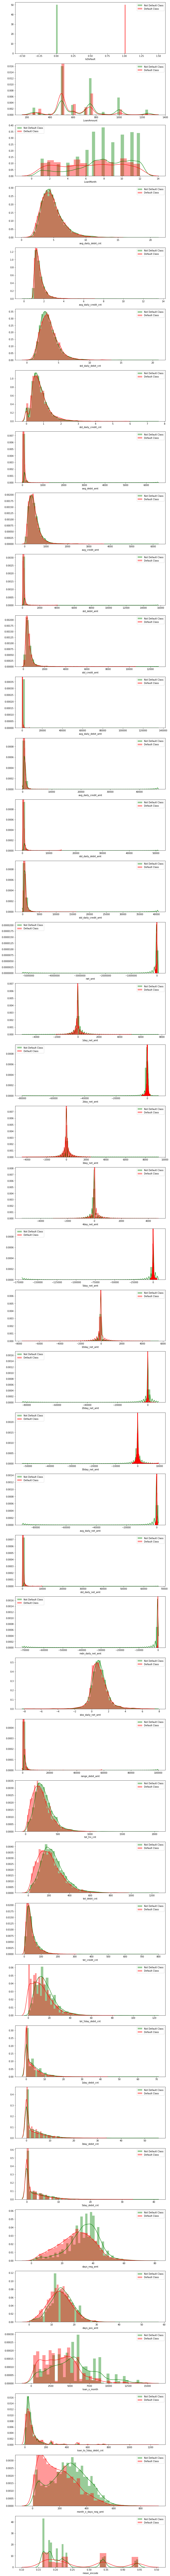

In [76]:
df_temp = final_df.drop(columns = ['LoanFlinksId'])
features = final_df.loc[:, df_temp.columns != 'IsDefault'].columns
plt.figure(figsize=(12,(len(df_temp.columns)-1)*5))
gs = gridspec.GridSpec((len(df_temp.columns)-1),1)

for i, col in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df_temp[col][df_temp['IsDefault']==0],color='g',label='Not Default Class')
    sns.distplot(df_temp[col][df_temp['IsDefault']==1],color='r',label='Default Class')
    ax.legend()
plt.show()

We can observe almost identical distributions of default and not-default cases for **avg_daily_debit_cnt**, **avg_daily_credit_cnt**, **std_credit_amt**, **avg_daily_credit_amt**, etc. I might have to exclude these features in one of the experiments later.

Let's also have a look at the relationship between features using pair-plots.

In [77]:
g = sns.pairplot(df_temp,hue="IsDefault",diag_kind='kde')

C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Since I have quite a lot of features, I ran into memory problem when generating this chart. However, it was observed that some of the features do contain a separation between default cases versus not-default cases. 

### Predictive Modeling

In [9]:
final_df.IsDefault.value_counts(normalize=True)

0    0.733333
1    0.266667
Name: IsDefault, dtype: float64

We are dealing with imbalanced data obviously, but I'll start training a baseline model without balancing the dataset.

In [20]:
X = final_df.drop(columns = ['IsDefault','customer_id']).values 
y = final_df.iloc[:, 1].values

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Baseline Models

In [23]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

Random Forest is considered as a very handy and easy to use algorithm, because it’s default hyperparameters often produce a good prediction result. 

XGBoost is well known to provide better solutions than other machine learning algorithms. In fact, since its inception, it has become the "state-of-the-art” machine learning algorithm to deal with structured data.

For these reasons, I'll these two algorithms to train the first models.

In [24]:
RFC = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, class_weight={0:1,1:1.2})
XGBC = XGBClassifier(n_estimators=500, random_state = 0, scale_pos_weight = 4)
model_name = ["RF", "XGB"]

In [26]:
for clf,i in zip([RFC, XGBC], model_name):
        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(X_train, y_train)))
        print("Test Accuracy = {:.3f}".format(model.score(X_test, y_test)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        #Confusion Matrix
        print(confusion_matrix(y_test, y_pred))
        print("-"*15,"CLASSIFICATION REPORT","-"*15)
        print(classification_report(y_test, y_pred))

######################### RF #########################
Training Accuracy = 0.999
Test Accuracy = 0.760
ROC_AUC_score : 0.597024
[[2610  106]
 [ 793  241]]
--------------- CLASSIFICATION REPORT ---------------
             precision    recall  f1-score   support

          0       0.77      0.96      0.85      2716
          1       0.69      0.23      0.35      1034

avg / total       0.75      0.76      0.71      3750



C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


######################### XGB #########################
Training Accuracy = 0.776
Test Accuracy = 0.661
ROC_AUC_score : 0.671317
[[1758  958]
 [ 315  719]]
--------------- CLASSIFICATION REPORT ---------------
             precision    recall  f1-score   support

          0       0.85      0.65      0.73      2716
          1       0.43      0.70      0.53      1034

avg / total       0.73      0.66      0.68      3750



C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**Observation:**
When AUC is approximately 0.5, the model has no discrimination capacity to distinguish between positive class and negative class. So these baseline models are performing quite poorly. 

#### Model no.2: SMOTE

Earlier, I mentioned that we are dealing with imbalanced data. Rather than upsampling the minority observations or downsampling the majority observations, Synthetic Minority Oversampling (SMOTE) works by creating synthetic observations based upon the existing minority observations. Empirical evidence has shown that SMOTE usually works better than either under- or oversampling.  

In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X = final_df.drop(columns = ['IsDefault','customer_id'])
y = final_df.iloc[:, 1]
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, y_train = sm.fit_sample(X_train_sm, y_train_sm)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_test = np.array(X_test)
y_test = np.array(y_test)

Let's make sure that the training dataset is now balanced using SMOTE.

In [29]:
pd.DataFrame(y_train, columns=['target'])['target'].value_counts()

1    7736
0    7736
Name: target, dtype: int64

In [30]:
for clf,i in zip([RFC, XGBC], model_name):
        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(X_train, y_train)))
        print("Test Accuracy = {:.3f}".format(model.score(X_test, y_test)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        #Confusion Matrix
        print(confusion_matrix(y_test, y_pred))
        print("-"*15,"CLASSIFICATION REPORT","-"*15)
        print(classification_report(y_test, y_pred))

######################### RF #########################
Training Accuracy = 1.000
Test Accuracy = 0.751
ROC_AUC_score : 0.653441
[[2837  427]
 [ 695  541]]
--------------- CLASSIFICATION REPORT ---------------
             precision    recall  f1-score   support

          0       0.80      0.87      0.83      3264
          1       0.56      0.44      0.49      1236

avg / total       0.74      0.75      0.74      4500



C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


######################### XGB #########################
Training Accuracy = 0.873
Test Accuracy = 0.716
ROC_AUC_score : 0.680260
[[2476  788]
 [ 492  744]]
--------------- CLASSIFICATION REPORT ---------------
             precision    recall  f1-score   support

          0       0.83      0.76      0.79      3264
          1       0.49      0.60      0.54      1236

avg / total       0.74      0.72      0.72      4500



C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**Observation:**
ROC-AUC score experiences some gains. It's also showing that both Random Forest and XGboost perform better on recall than before but precision decreases as a trade-off.

#### Model no.3: Adjusting class weight without SMOTE

Random Forest and XGBoost have the options of assigning class weight as one of the hyperparameters. So this is what we will try to do here.

In [37]:
RFC = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, class_weight={0:1,1:3})
XGBC = XGBClassifier(n_estimators=500, random_state = 0, scale_pos_weight = 3)
model_name = ["RF", "XGB"]
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X = final_df.drop(columns = ['IsDefault','customer_id'])
y = final_df.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

for clf,i in zip([RFC, XGBC], model_name):
        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(X_train, y_train)))
        print("Test Accuracy = {:.3f}".format(model.score(X_test, y_test)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        #Confusion Matrix
        print(confusion_matrix(y_test, y_pred))
        print("-"*15,"CLASSIFICATION REPORT","-"*15)
        print(classification_report(y_test, y_pred))

######################### RF #########################
Training Accuracy = 0.999
Test Accuracy = 0.761
ROC_AUC_score : 0.595710
[[2616  100]
 [ 798  236]]
--------------- CLASSIFICATION REPORT ---------------
             precision    recall  f1-score   support

          0       0.77      0.96      0.85      2716
          1       0.70      0.23      0.34      1034

avg / total       0.75      0.76      0.71      3750



C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


######################### XGB #########################
Training Accuracy = 0.822
Test Accuracy = 0.699
ROC_AUC_score : 0.676380
[[1972  744]
 [ 386  648]]
--------------- CLASSIFICATION REPORT ---------------
             precision    recall  f1-score   support

          0       0.84      0.73      0.78      2716
          1       0.47      0.63      0.53      1034

avg / total       0.73      0.70      0.71      3750



C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**Observations**: The 2 models show different behaviors after the weight adjustment. Random forest is prioritizing precision while compromising the recall; XGBoost's results are relatively more balanced which yields a higher AUC score.

#### Model no.4: Adjusting class weight + SMOTE

In [62]:
RFC = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, class_weight={0:1,1:2})
XGBC = XGBClassifier(n_estimators=484, random_state = 0, scale_pos_weight =2.5)
model_name = ["RF", "XGB"]
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X = final_df.drop(columns = ['IsDefault','customer_id'])
y = final_df.iloc[:, 1]
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, y_train = sm.fit_sample(X_train_sm, y_train_sm)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

for clf,i in zip([RFC, XGBC], model_name):
        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(X_train, y_train)))
        print("Test Accuracy = {:.3f}".format(model.score(X_test, y_test)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        #Confusion Matrix
        print(confusion_matrix(y_test, y_pred))
        print("-"*15,"CLASSIFICATION REPORT","-"*15)
        print(classification_report(y_test, y_pred))

######################### RF #########################
Training Accuracy = 1.000
Test Accuracy = 0.751
ROC_AUC_score : 0.653441
[[2837  427]
 [ 695  541]]
--------------- CLASSIFICATION REPORT ---------------
             precision    recall  f1-score   support

          0       0.80      0.87      0.83      3264
          1       0.56      0.44      0.49      1236

avg / total       0.74      0.75      0.74      4500



C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


######################### XGB #########################
Training Accuracy = 0.851
Test Accuracy = 0.695
ROC_AUC_score : 0.690143
[[2287  977]
 [ 396  840]]
--------------- CLASSIFICATION REPORT ---------------
             precision    recall  f1-score   support

          0       0.85      0.70      0.77      3264
          1       0.46      0.68      0.55      1236

avg / total       0.75      0.69      0.71      4500



C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**Observations**: The gain in AUC is mainly observed in Random Forest. I had to slightly reduce the weight in XGBoost to maintain its performance. 

#### Model no.5: Adjusting class weight + SMOTE + reducing features

Since the training accuracy is higher than test accuracy, the model is possibly overfitting.I might be able to achieve some improvements by simply eliminating some of the features that could have caused overfitting. Let's first take a look at the feature importance from the XGBoost model since it's leading in terms of AUC score:

In [39]:
pd.DataFrame(XGBC.feature_importances_, index=X.columns, columns=['feature importance']).sort_values(by=['feature importance'], ascending=False)

,feature importance
LoanAmount,0.049661
tot_5day_debit_cnt,0.041024
1day_debit_cnt,0.039173
days_pos_amt,0.036397
5day_debit_cnt,0.036089
loan_to_5day_debit_cnt,0.035472
20day_net_amt,0.033621
days_neg_amt,0.033313
2day_net_amt,0.029611
std_daily_debit_cnt,0.027452


Let's try to remove the two features with lowest feature-importance:

In [80]:
features_to_drop = ['LoanMonth',
                    'tot_trx_cnt',
                    'IsDefault',
                    'customer_id'
                    ]

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 0)
X = final_df.drop(columns = features_to_drop)
y = final_df.iloc[:, 1]
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, y_train = sm.fit_sample(X_train_sm, y_train_sm)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_test = np.array(X_test)
y_test = np.array(y_test)

RFC = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, class_weight={0:1,1:2})
XGBC = XGBClassifier(n_estimators=500, random_state = 0, scale_pos_weight = 2)

for clf,i in zip([RFC, XGBC], model_name):
        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        print("#"*25,i,"#"*25)
        print("Training Accuracy = {:.3f}".format(model.score(X_train, y_train)))
        print("Test Accuracy = {:.3f}".format(model.score(X_test, y_test)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        #Confusion Matrix
        print(confusion_matrix(y_test, y_pred))
        print("-"*15,"CLASSIFICATION REPORT","-"*15)
        print(classification_report(y_test, y_pred))

######################### RF #########################
Training Accuracy = 1.000
Test Accuracy = 0.750
ROC_AUC_score : 0.649517
[[2851  413]
 [ 710  526]]
--------------- CLASSIFICATION REPORT ---------------
             precision    recall  f1-score   support

          0       0.80      0.87      0.84      3264
          1       0.56      0.43      0.48      1236

avg / total       0.73      0.75      0.74      4500



C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


######################### XGB #########################
Training Accuracy = 0.871
Test Accuracy = 0.711
ROC_AUC_score : 0.673874
[[2466  798]
 [ 504  732]]
--------------- CLASSIFICATION REPORT ---------------
             precision    recall  f1-score   support

          0       0.83      0.76      0.79      3264
          1       0.48      0.59      0.53      1236

avg / total       0.73      0.71      0.72      4500



C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**Observation**: Removing features with lowest importance only made it worse. So it may be wise to keep the full list of the existing features.  

#### Model no.6: Tuning XGBoost

We have seen the highest AUC score from XGBoost with SMOTE balancing method and weight adustment. I will continue to tune XGBoost to attempt higher AUC. Let's take a look at what are the parameters currently in use:

In [113]:
print('Parameters currently in use:\n')
print(XGBC.get_params())

Parameters currently in use:

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 500, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 2, 'seed': None, 'silent': True, 'subsample': 1}


I'll use gridsearch to tune the model:

In [114]:
from sklearn.grid_search import GridSearchCV

C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [137]:
cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4]}    # parameters to be tries in the grid search
fix_params = {'learning_rate': 0.1, 'n_estimators': 500, 'objective': 'binary:logistic', 'scale_pos_weight' : 2}   #other parameters, fixed for the moment 
csv = GridSearchCV(XGBClassifier(**fix_params), cv_params, scoring = 'roc_auc', cv = 5)
csv.fit(X_train, y_train)
csv.best_params_

{'max_depth': 6, 'min_child_weight': 2}

In [138]:
cv_params = {'subsample': [0.8,0.9,1], 'max_delta_step': [0,1,2,4]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 500, 'objective': 'binary:logistic', 'max_depth': 6, 'min_child_weight':2, 'scale_pos_weight' : 2}
csv = GridSearchCV(XGBClassifier(**fix_params), cv_params, scoring = 'roc_auc', cv = 5)
csv.fit(X_train, y_train)
csv.best_params_

{'max_delta_step': 1, 'subsample': 0.8}

In [139]:
cv_params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}
fix_params['max_delta_step'] = 1
fix_params['subsample'] = 0.8
csv = GridSearchCV(XGBClassifier(**fix_params), cv_params, scoring = 'roc_auc', cv = 5)
csv.fit(X_train, y_train)
csv.best_params_

{'learning_rate': 0.2}

In [140]:
fix_params['learning_rate'] = 0.2
fix_params

{'learning_rate': 0.2,
 'max_delta_step': 1,
 'max_depth': 6,
 'min_child_weight': 2,
 'n_estimators': 500,
 'objective': 'binary:logistic',
 'scale_pos_weight': 2,
 'subsample': 0.8}

In [43]:
xgb_clf = XGBClassifier(learning_rate = 0.2, 
                        n_estimators=500, 
                        random_state = 0, 
                        scale_pos_weight = 2,
                        max_depth = 6,
                        min_child_weight=2,
                        objective='binary:logistic',
                        subsample=0.8,
                        max_delta_step=1)

xgb_final = xgb_clf.fit(X_train, y_train)
y_pred = xgb_final.predict(X_test)
y_pred_prob = xgb_final.predict_proba(X_test)[:,1]
print("#"*25,i,"#"*25)
print("Training Accuracy = {:.3f}".format(xgb_final.score(X_train, y_train)))
print("Test Accuracy = {:.3f}".format(xgb_final.score(X_test, y_test)))
print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
#Confusion Matrix
print(confusion_matrix(y_test, y_pred))
print("-"*15,"CLASSIFICATION REPORT","-"*15)
print(classification_report(y_test, y_pred))

C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


######################### XGB #########################
Training Accuracy = 1.000
Test Accuracy = 0.741
ROC_AUC_score : 0.639258
[[2821  443]
 [ 724  512]]
--------------- CLASSIFICATION REPORT ---------------
             precision    recall  f1-score   support

          0       0.80      0.86      0.83      3264
          1       0.54      0.41      0.47      1236

avg / total       0.72      0.74      0.73      4500



C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**Observation**: It's rather disappointing that the tuned results did not beat the results generated by the initial parameters. The clear winner is XGBoost of Model no.4 (i.e. SMOTE + class_weight=2)

### Making Predictions

As a recap, this is my final model:

In [61]:
X = final_df.drop(columns = ['IsDefault','customer_id'])
y = final_df.iloc[:, 1]
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, y_train = sm.fit_sample(X_train_sm, y_train_sm)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

XGBC_best = XGBClassifier(n_estimators=484, random_state = 0, scale_pos_weight =2.5)
best_model = XGBC_best.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:,1]
print("#"*25,i,"#"*25)
print("Training Accuracy = {:.3f}".format(best_model.score(X_train, y_train)))
print("Test Accuracy = {:.3f}".format(best_model.score(X_test, y_test)))
print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
#Confusion Matrix
print(confusion_matrix(y_test, y_pred))
print("-"*15,"CLASSIFICATION REPORT","-"*15)
print(classification_report(y_test, y_pred))

C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


######################### XGB #########################
Training Accuracy = 0.851
Test Accuracy = 0.695
ROC_AUC_score : 0.690143
[[2287  977]
 [ 396  840]]
--------------- CLASSIFICATION REPORT ---------------
             precision    recall  f1-score   support

          0       0.85      0.70      0.77      3264
          1       0.46      0.68      0.55      1236

avg / total       0.75      0.69      0.71      4500



C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ken.lam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


I'll now pre-process the real testing dataset and generate the predictions.

In [20]:
df_test = pd.read_csv('challenge_test.csv')
df_test_processed = features_extract_test(df_test, df)

In [21]:
df_test.head()

,customer_id,LoanAmount,LoanDate,TrxDate,DaysBeforeRequest,Debit,Credit,Amount,Balance,LoanMonth
0,56BF915D-ADA3-49F7-9793-0D6FDCD0A909-400,400,2017-10-26,2017-07-31,87,29.80,0.0,-29.80,283.77,10
1,56BF915D-ADA3-49F7-9793-0D6FDCD0A909-400,400,2017-10-26,2017-07-31,87,23.15,0.0,-23.15,200.62,10
2,FE3F499D-78F4-4C85-BD91-2C6B4086D460-650,650,2017-12-01,2017-09-05,87,800.00,0.0,-800.00,772.09,12
3,BBD7D791-711A-4440-949C-86D05D44A6A3-800,800,2017-10-18,2017-09-22,26,23.99,0.0,-23.99,305.94,10
4,F2251577-841B-4DC7-90B9-F6F8455FCD37-400,400,2017-12-15,2017-11-15,30,2.19,0.0,-2.19,16.59,12


In [72]:
X_final = df_test_processed.drop(columns = ['customer_id'])
X_final = sc.transform(X_final)
y_final_prob = best_model.predict_proba(X_final)[:,1]
submission = pd.DataFrame({'customer_id': df_test_processed['customer_id'], 'IsDefault': list(y_final_prob)}, columns=['customer_id', 'IsDefault'])

In [74]:
submission.to_csv('ken_lam.csv', index=False)

### Conclusion

The current results of this classifier are far from being desirable. It should be noted that we currently have no information regarding the nature of the transactions or any other information about the borrower. With additional features and data, this classifier can definitely be enhanced. I'll discuss about potential features that could improve the existing model in Part 2. 

## Part 2 Thinking outside the box

The Transaction Description can potentially reveal very important
information about the borrower’s purchasing habit and whether the customer shows sign of
having a stable income or not. 

To use TrxDescription as a categorical feature, we first need to parse and categorize the
description (e.g. income, restaurant, gas, groceries, etc.). To do so, we will need a dataset of
transaction description **with labeled categories**. Let's assume that we have such dataset; essentially, we need to train 2 models:

1) A word embedding model (i.e. vector representation of words); we can either train our own using word2vec or use a pre-trained model (e.g. GloVe pre-trained by Stanford NLP Group). The idea behind word2vec is that you train a model on the context on each word, so similar words will have similar numerical/vector representations.

2) A classifier for transaction descriptions; assuming that we trained our own word2vec model,we will use it to convert each transaction description into a “feature vector” that can be used for classification with any machine learning algorithm (e.g. Naïve Bayes, SVM, CNN, etc.)

The outcome of this is a set of category names associated with the transaction descriptions. Not only we can now use it as a categorical feature, but we can also derive other categorical features that can augment the data from Part 1:
- estimated annual salary (assuming we have "income" as one of the categories)
- pay frequency
- frequency of dining out
- amount of recurrent payments (e.g. electricity bills, other loans, etc.)
- main category of spendings

These features could very likely help to predict the probability of whether a borrower would pay back a loan or not.